# Sección 1




Considera el dataset del banco `banco.csv` y utilizando `pandas`, realiza las siguientes actividades:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

banco = pd.read_csv('input/banco.csv')


1. Obten y discute información sobre la media, desviación estándar y cuartiles: Q1, y Q3 de los datos.

In [2]:
print(banco.describe(), end='\n\n')

                age        balance           day
count  45211.000000   45211.000000  45211.000000
mean      40.936210    1362.272058     15.806419
std       10.618762    3044.765829      8.322476
min       18.000000   -8019.000000      1.000000
25%       33.000000      72.000000      8.000000
50%       39.000000     448.000000     16.000000
75%       48.000000    1428.000000     21.000000
max       95.000000  102127.000000     31.000000



Podemos ver que el promedio de edad esta en 40 años, el balance es de 1,362 en promedio, el dia en promedio es 15 (tal vez no nos sirve mucho este ultimo dato).

En cuanto a la desviacion estandar la edad es de 10 años que es un buen rango pues tenemos gente relativamente joven, mientras que en el balance es de 3,044 lo cual nos dice que existe mucha variabilidad lo cual no puede ser del todo bueno, pero al no estar normalizados puede ser que se lo que fecte o se vea como mucho; en el dia es de 8 pero pues esto puede ser muy subjetivo pues no sabemos en si que significa el dia. 

Tenemos en edad cuartiles entre 33 y 48 años lo cual es bueno pues es una poblacion joven que podemos ofrecer creditos. Mientras que en balance es de 72 y 1428 unidades monetarias.En dia esta entre 8 y 21 dias  

2. Localiza los datos faltantes y reemplazalos con alguna de las técnicas vistas en clase, justifica y explica la decisión tomada.

Utilizamos la funcion `isnull` busca los valores que tengan 'NaN O None' marcan True y False en caso de que no, con `sum()` sumamos todos los valores True (es decir todos los valores nulos). Por ultimo con `end='\n\n'` nos imprime el resultado de cada columna  mostarnadonos cuantos valores nulos hay en cada columna 

In [3]:
# Localiza y cuenta datos nulos en cada columna
print(banco.isnull().sum(), end='\n\n')

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
dtype: int64



No existen datos faltantes, por lo que no hacemos tranfsormaciones.

3. Calcula los diferentes Estados civiles de los cuenta habientes y grafica los porcentajes mediante un pie plot de `seaborn`.

Creamos una variable `marital_counts` la cua se basa en acceder al Dataframe banco en la columna con `.values_counts()` cuenta la frecuencia de cada valor unico en la columna y con `normalize` las convierte en valores entre 0 y 1 el $*100$ las convierte en porcentajes

Creamos la figura para el gráfico, de tamaño 8*8.`Explode` es una tupla que define cuánto se "separará" cada porción del gráfico de torta. `plt.pie` me crea un grafico de pastel, el primer parametro es meter los datos a graficas, los labels para las etiquetas de cada porcion, `autopct='%1.1f%%'` me sirve para mostrar el porcentaje con un decimal, `explode=explode` para aplicar la separacion que definimos arriba.

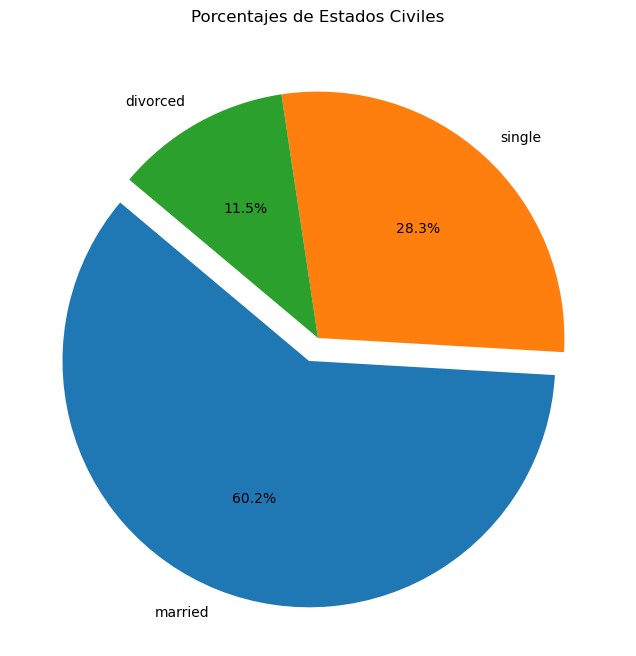

In [4]:
marital_counts = banco['marital'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0)
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Porcentajes de Estados Civiles')
plt.show()

Podemos ver que la gran mayoria de los asociados estan casados y el 28% corresponde a personas solteras y solo el 11% a personas divorciadas

4. ¿Qué instrucción de pandas usas para filtrar los registros de los cuentahabientes mayores de 50 años cuyo trabajo es del área de Administración?

Creamos la variable `filtro1` la cual busca en el dataframe banco, filtra las filas donde la columna age (edad) es mayor que 50, al igual que filtra de la columna job (trabajo) las que son igual a `management`, esto se ebe cumplir al mismo tiempo y lo juntamos con el operador logico `&`. Procedemos a imprimir todos los reultaddos  

In [5]:
filtro1 = banco[(banco['age'] > 50) & (banco['job'] == 'management')]
print(filtro1, end='\n\n')

       age         job   marital education  balance housing loan   contact  \
0       58  management   married  tertiary     2143     yes   no   unknown   
21      56  management   married  tertiary      779     yes   no   unknown   
34      51  management   married  tertiary    10635     yes   no   unknown   
65      51  management   married  tertiary     6530     yes   no   unknown   
67      59  management  divorced  tertiary       59     yes   no   unknown   
...    ...         ...       ...       ...      ...     ...  ...       ...   
45072   54  management  divorced  tertiary     5475      no   no  cellular   
45109   78  management   married   unknown     1780     yes   no  cellular   
45150   65  management   married   unknown     2352      no   no  cellular   
45194   59  management   married  tertiary      138     yes  yes  cellular   
45201   53  management   married  tertiary      583      no   no  cellular   

       day month  
0        5   may  
21       5   may  
34    

En base a lo que vemos pormeos ver que la mayoria tiene educación tertiary (terciaria o superior). Al igual de que todos tienen el trabajo management (gerencia o administración). Lo cual hace que tengan un balance positivo, lo cual nos da un buen indicio gracias a la edaad y a su pueto. Ademas de que la mayoria indica que no tienen préstamos personales pendientes. 

5. Convierte la variable loan a numérica usando dummies

Del dataframe banco en la columna de `loan` con la funcion `.get_dummies()`  conviertimos una columna categórica en variables binarias; de modo que si la columna tiene tiene valores como 'yes' y 'no', get_dummies crea columnas binarias para cada categoría, con el parametro de `drop_first=True` eliminamos la primera categoría (i.e,si hay dos categorías, solo se crea una columna binaria). Por ultimo convertimos la columna a tipo entero para asegurar que los valores sean numéricos y no objetos.

In [6]:
banco['loan'] = pd.get_dummies(banco['loan'], drop_first=True)
banco['loan'] = banco['loan'].astype(int)
print(banco.head(), end='\n\n')

   age           job  marital  education  balance housing  loan  contact  day  \
0   58    management  married   tertiary     2143     yes     0  unknown    5   
1   44    technician   single  secondary       29     yes     0  unknown    5   
2   33  entrepreneur  married  secondary        2     yes     1  unknown    5   
3   47   blue-collar  married    unknown     1506     yes     0  unknown    5   
4   33       unknown   single    unknown        1      no     0  unknown    5   

  month  
0   may  
1   may  
2   may  
3   may  
4   may  



6. ¿Qué instrucción de pandas usas para filtrar sólo las columnas: contact, housing y day de personas cuyo valor de educación es ‘secondary’?

Del dataframe con la funcion `.loc` seleccionamos solo las filas donde la columna education tiene el valor 'secondary', y luego extraemos solo las columnas contact, housing y day, a este filtrado lo definimos como un nuevo Dataframe que contiene lo antes explicado. Procedemos a imprimir el resultado

In [7]:
filtro2 = banco.loc[banco['education'] == 'secondary', ['contact', 'housing', 'day']]
print(filtro2, end='\n\n')

         contact housing  day
1        unknown     yes    5
2        unknown     yes    5
9        unknown     yes    5
10       unknown     yes    5
11       unknown     yes    5
...          ...     ...  ...
45204   cellular      no   17
45205   cellular      no   17
45208   cellular      no   17
45209  telephone      no   17
45210   cellular      no   17

[23202 rows x 3 columns]



7. Realiza la gráfica de bigotes de balance y compara con la función `describe()` de `pandas`. Compara si ambos métodos indican las mismas observaciones

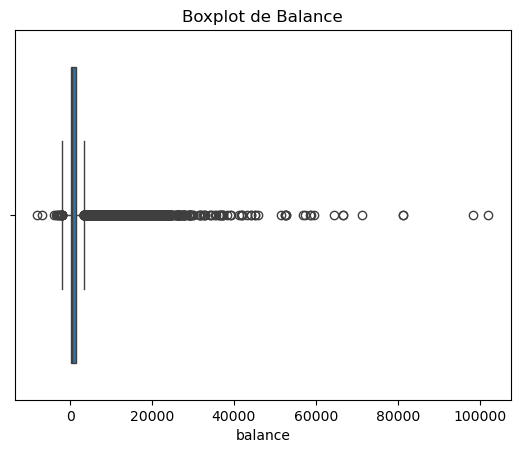

In [8]:
sns.boxplot(x=banco['balance'])
plt.title('Boxplot de Balance')
plt.show()

In [9]:
banco['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Veamos que describe nos da que la media es 1362.27, la desviación estándar de 3044.76 (alta dispersión de los datos).Mínimo de -8019; percentiles (25%, 50%, 75%): La mediana (50%) es 448, y el 75% de los datos está por debajo de 1428, mientras que el máximo 102127.

Comparando esto con el grafico nos dice que existen outliers por encima de 20,000. La presencia de valores extremos muy dispersos hasta 102127, que confirman lo visto en el máximo de `describe()`.

8. Crea una columna nueva llamada ‘riesgo’ que valga 1 o 0, valdrá 1 si el cuentahabiente ha pedido préstamos hipotecarios y personales y su contacto es desconocido. En cualquier otro caso es 0.

Creamos la columna 'risk' o 'riesgo' en el dataframe de banco que se compone de asignar 1 o 0 de acurdo a las siguientes condiciones: verificamos si la columna housing tiene el valor 'yes', ademas que la columna loan tiene el valor 'yes' y por ultimo que la columna contact tiene el valor 'unknown' hacemos el conjunto de todas estas con el operador `&`. por ultimo con `.astype(int)`  conviertimos los valores booleanos (True o False; los que encontramos con el filtrado) en enteros (1 o 0). 

Despues imprimimos el resultados

In [10]:
banco['risk'] = ((banco['housing'] == 'yes') & (banco['loan'] == 'yes') & (banco['contact'] == 'unknown')).astype(int)
print(banco, end='\n\n')

       age           job   marital  education  balance housing  loan  \
0       58    management   married   tertiary     2143     yes     0   
1       44    technician    single  secondary       29     yes     0   
2       33  entrepreneur   married  secondary        2     yes     1   
3       47   blue-collar   married    unknown     1506     yes     0   
4       33       unknown    single    unknown        1      no     0   
...    ...           ...       ...        ...      ...     ...   ...   
45206   51    technician   married   tertiary      825      no     0   
45207   71       retired  divorced    primary     1729      no     0   
45208   72       retired   married  secondary     5715      no     0   
45209   57   blue-collar   married  secondary      668      no     0   
45210   37  entrepreneur   married  secondary     2971      no     0   

         contact  day month  risk  
0        unknown    5   may     0  
1        unknown    5   may     0  
2        unknown    5   may

Por los pocos datos que podemos ver es que la mayoria no entran en el rango de riesgo que definimos , es decir , la mayoria se encuentran en cero. Es decir de la mayoria tenemos datos de modo que piodemos contactarlos en caso de que no cumplan con pagar los prestamos. 

9. ¿Hay correlación entre las variables ‘age’ y ‘balance’ de los cuentahabientes? Resuelve esta pregunta mediante una gráfica de tipo scatter plot

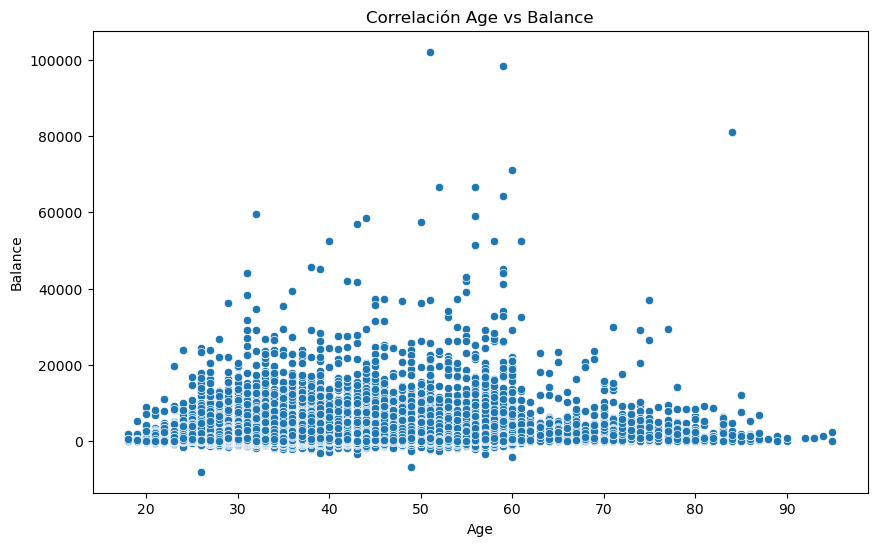

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=banco)
plt.title('Correlación Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

En base a la grafica, no existe una relacion en los datos o un patron que puedan seguir los datos; por lo que no podemos decir que existe una correlacion entre edad y balance

10. Realiza una gráfica de barras de `seaborn` de los cuentahabientes por ‘job’

Aqui solo explicaremos como funciona `sns.countplot()` me sirve para hacer graficas de barras , de moto que nuestra informacion la toma del Dataframe de banco, en nuestro eje x toma la columna de 'job' , en el paramtro de order, `.value_counts()` cuenta la frecuencia de cada categoría en la columna job, con index extraemos las categorías ordenadas por frecuencia y de esta manera ordena las barras en el grafico segun la frecuencia que metimos (i.e, la categoria mas comun al incio).

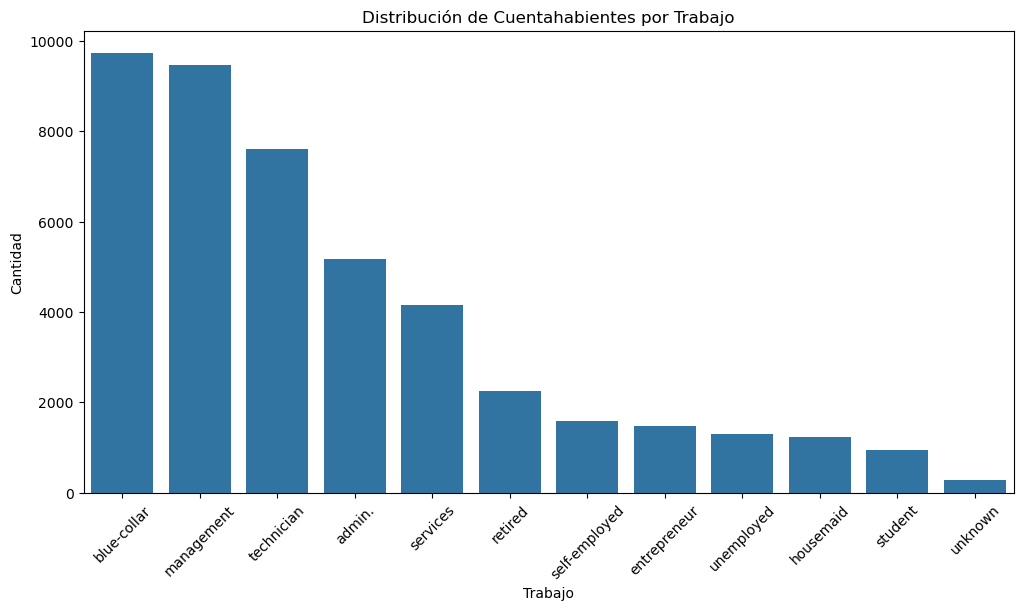

In [12]:
plt.figure(figsize=(12, 6)) #Crear grafico 
sns.countplot(data=banco, x='job', order=banco['job'].value_counts().index)
plt.title('Distribución de Cuentahabientes por Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Sección 2

Considera una lista de tamaño 20, con elementos aleatorios entre 0 y 15. 

In [13]:
import random

randoms = [random.randint(0, 15) for _ in range(20)]
print('Lista de números aleatorios:')
print(randoms, end='\n\n')

Lista de números aleatorios:
[11, 2, 11, 8, 13, 0, 0, 11, 5, 11, 0, 4, 11, 15, 1, 5, 13, 5, 1, 4]



En este código se utilizan algunos conceptos de listas para poder extraer elementos.

Primero importamos la libreria necesaria para el ejercicio (import random) y para generar la lista generamos un numero random entre 0 y 15 y este proceso lo repetimos 20 veces añadiendo cada elemento a la lista random, el valor de la iteración no nos importa y por eso no se guarda.

Este ejercicio se abordó desde el hecho de que en listas si empezamos a contar indices de izquierda a derecha se empieza desde 0 y va aumentando. Mientras que si contamos del final hacia atras empezamos desde el indice -1 y disminuyendo (el último el -1, el penúltimo el -2...).

Para los dos primeros incisos implementamos estas dos definiciones tomando en cuenta que el rango excluye el índice en la derecha para ambos casos (osea llega hasta un elemento antes del especificado)

Para los siguientes dos incisos, si se pone de argumento los dos puntos se tomaran todos los elementos hasta el indice especificado, ya sea al inicio o al final. De igual manera en esta parte tomamos el concepto de los indices negativos mencionado anteriormente y lo aplicamos.

1) $[m:n]$

In [14]:
print('[m:n]')
print(randoms[2:12]) #[m:n]
print(randoms[-18:-8], end='\n\n')

[m:n]
[11, 8, 13, 0, 0, 11, 5, 11, 0, 4]
[11, 8, 13, 0, 0, 11, 5, 11, 0, 4]



2) $[-m:n]$

In [15]:
print('[-m:n]')
print(randoms[-17:13]) #[-m:n]
print(randoms[3:13], end='\n\n')

[-m:n]
[8, 13, 0, 0, 11, 5, 11, 0, 4, 11]
[8, 13, 0, 0, 11, 5, 11, 0, 4, 11]



3) $[m:]$

In [16]:
print('[m:]')
print(randoms[5:]) #[m:]
print(randoms[-15:], end='\n\n')

[m:]
[0, 0, 11, 5, 11, 0, 4, 11, 15, 1, 5, 13, 5, 1, 4]
[0, 0, 11, 5, 11, 0, 4, 11, 15, 1, 5, 13, 5, 1, 4]



4) $[:n]$

In [17]:
print('[:n]')
print(randoms[:7]) #[:n]
print(randoms[:-13], end='\n\n')

[:n]
[11, 2, 11, 8, 13, 0, 0]
[11, 2, 11, 8, 13, 0, 0]



Esta sección de la práctica nos ayudó a reforzar el concepto de listas ya que desde la ceación hasta el acceso e impresión de diferentes elementos se abordaron diversos conceptos que nos ayudaron a entender de mejor manera como es que trabaja esta estructura de datos.

# Sección 3

1. Utiliza networkx para generar la gráfica de la Figura 1.

![Figura 1](img/Fig1.png)

2. Genera e imprime en pantalla la matriz de adyacencias de esta gráfica.
3. Imprime el grado de cada vértice.

Primero se importan las bibliotecas necesarias para el ejercicio, Networkx para la creación del grafo y Matplotlib para su respectiva visualización.

Se crea `G` el cual es una variable que en ese momento es un grafo no dirigido. 

Se agregan los nodos del 1 al 9 con el método `add_edges_from`

Se  crea la lista te tuplas la cual posteriormente se usa para generar aristas entre los nodos ya creados en el grafo con el método `add_edges_from`.

Se dibuja el grafo, se ajustan los margenes para una mejor representación y se ocultan los ejes x y y. Finalmente se desplega la visualización con el `plt.show()`.

Se obtiene por medio del método: `nx.adjacency_matrix(G)` la matriz de adyacencia del grafo. 

Posteriormente el grado de cada vertice se mapea a un diccionario de la forma nodo:grado con ayuda del método: `G.degree()`. Posteriormente se imprime el contenido de este diccionario creado.

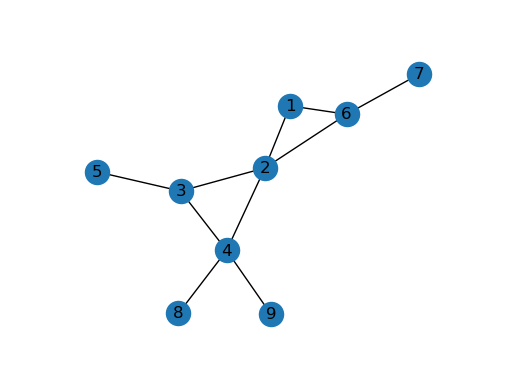

Matriz de adyacencias
 [[0 1 0 0 0 1 0 0 0]
 [1 0 1 1 0 1 0 0 0]
 [0 1 0 1 1 0 0 0 0]
 [0 1 1 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]

Grado de los vertices
 {1: 2, 2: 4, 3: 3, 4: 4, 5: 1, 6: 3, 7: 1, 8: 1, 9: 1}


In [18]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from(range(1, 10))
edges = [(5, 3), (3, 4), (3, 2), (8, 4), (4, 9), (2, 1), (1, 6), (2, 6), (6, 7), (4, 2)]
G.add_edges_from(edges)

nx.draw_networkx(G)
ax = plt.gca()
ax.margins(0.20)
plt.axis('off')
plt.show()

adj_matrix = nx.adjacency_matrix(G)
print('Matriz de adyacencias\n', adj_matrix.todense(), end='\n\n')

degrees = dict(G.degree())
print('Grado de los vertices\n', degrees)


En esta sección de la práctica se reforzaron los conceptos basicos de la creación de grafos en el entorno python y con la ayuda de las diversas bibliotecas que python tiene. Se creó un grafo con varios nodos y sus respectivas aristas. Apartir del grafo creado se extrajo información importante como la matriz de adyacencia o los vecinos de cada nodo al igual que una visualización representativa del grafo.

# Sección 4

1. Representa este grafo utilizando la librería `NetworkX` de python.

![Grafo](img/grafo.png)


Usamos `networkx` para crear un **grafo dirigido** que representa proyectos de una empresa con sus trabajadores y detalles.  Algunos de los pasos que usamos es : 

1. **Definimos una estructura de datos (`nodes`)** 
   - Representan proyectos como nombre, número, ubicación y trabajadores.  
   - Cada trabajador tiene su SSN, nombre y horas trabajadas.  

2. **Se crea un grafo dirigido (`G = nx.DiGraph()`)**  
   - Los nodos representan elementos como proyectos y trabajadores.  
   - Las aristas son las relaciones entre estos elementos.  

3. **Función `add_nodes_recursive(data, parent_id=None)`**  
   - Agrega nodos al grafo desde la estructura `nodes`.  
   - Si un nodo tiene un "padre", se crea una arista conectándolos.  

4. **Ejecutando el código (`if __name__ == "__main__":`)**  
   - Se crea el grafo con `create_graph()`.  
   - Se imprimen todos los nodos y las aristas.  

In [19]:
import networkx as nx

def create_graph():
    """
    Crea y devuelve un grafo dirigido con los nodos y aristas harcodeados
    'nodes'.
    """
    nodes = {
        "name": "Company Projects",
        "children": [
            {
                "name": "Project 1",
                "children": [
                    {
                        "name": "Name",
                        "value": "Product X"
                    },
                    {
                        "name": "Number",
                        "value": 123
                    },
                    {
                        "name": "Location",
                        "value": "Bellaire"
                    },
                    {
                        "name": "Worker 1",
                        "children": [
                            {
                                "name": "ssn_1",
                                "value": 123456789
                            },
                            {
                                "name": "first_name_1",
                                "value": "Smith"
                            },
                            {
                                "name": "hours_1",
                                "value": 40.00
                            }
                        ]
                    },
                    {
                        "name": "Worker 2",
                        "children": [
                            {
                                "name": "ssn_2",
                                "value": 987654321
                            },
                            {
                                "name": "first_name_2",
                                "value": "Joyce"
                            },
                            {
                                "name": "hours_2",
                                "value": 40.00
                            }
                        ]
                    }
                ]
            },
            {
                "name": "Project 2"
            }
        ],
    }
    G = nx.DiGraph()

    def add_nodes_recursive(data, parent_id=None):
        # Usar el atributo "name" como identificador único del nodo
        node_id = data["name"]
        attr = {}
        if "value" in data:
            attr["value"] = data["value"]
        G.add_node(node_id, **attr)
        if parent_id is not None:
            G.add_edge(parent_id, node_id)
        for child in data.get("children", []):
            add_nodes_recursive(child, parent_id=node_id)

    add_nodes_recursive(nodes)
    return G
if __name__ == "__main__":
    print("".join(['\n' for _ in range(3)]))
    G = create_graph()
    print("Nodes:")
    for node in G.nodes:
        print(f" - {node}")
    print("\nEdges:")
    for edge in G.edges:
        print(f" - {edge[0]} -> {edge[1]}")





Nodes:
 - Company Projects
 - Project 1
 - Name
 - Number
 - Location
 - Worker 1
 - ssn_1
 - first_name_1
 - hours_1
 - Worker 2
 - ssn_2
 - first_name_2
 - hours_2
 - Project 2

Edges:
 - Company Projects -> Project 1
 - Company Projects -> Project 2
 - Project 1 -> Name
 - Project 1 -> Number
 - Project 1 -> Location
 - Project 1 -> Worker 1
 - Project 1 -> Worker 2
 - Worker 1 -> ssn_1
 - Worker 1 -> first_name_1
 - Worker 1 -> hours_1
 - Worker 2 -> ssn_2
 - Worker 2 -> first_name_2
 - Worker 2 -> hours_2


2. Visualiza el grafo utilizando la librería `matplotlib.pyplot`.

Aqui visualizamos un **grafo dirigido** usando `networkx` y `matplotlib`.  
1. **Librerias que usamos**  
   - `matplotlib.pyplot`: Para dibujar el grafo.  
   - `networkx`: Para manejar estructuras de grafos.  
   - `pformat` (de `pprint`): Para mostrar datos de nodos de forma legible.  
   - `create_graph` (desde `Secc4In_1`): Función que genera el grafo(el inciso anterior).  

2. **Función `draw_graph()`**  
   - Obtenemos el grafo con `create_graph()`.  
   - Usamos `nx.spring_layout()` para distribuir los nodos.  
   - Creamos las etiquetas con información de cada nodo.  
   - Dibujamos los nodos (`skyblue`), las conexiones y etiquetas.  
   - Se desactiva `plt.axis("off")` y se muestra el grafo.  

3. **Función `main()`**  
   - Llamamos a `draw_graph()` para generar la visualización.  

4. **Ejecutando el código (`if __name__ == "__main__":`)**  
   - Se ejecuta `main()` al correr el script.  

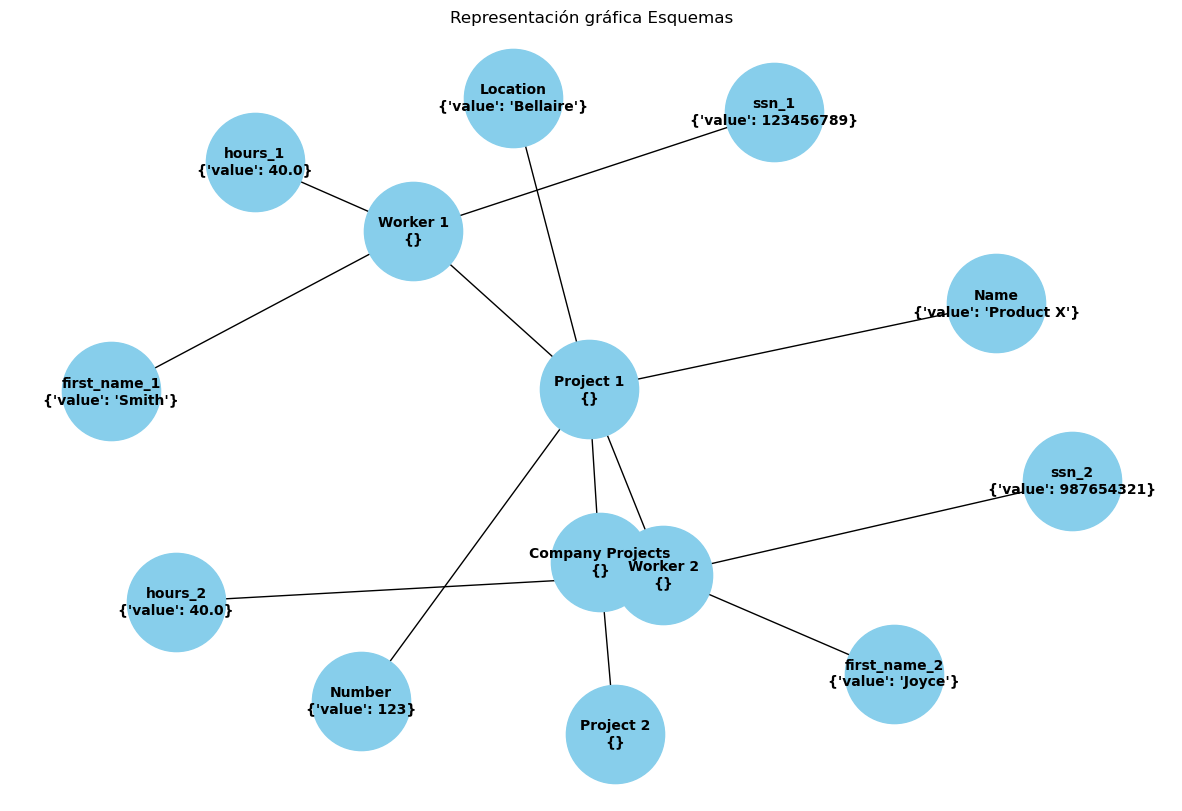

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
from pprint import pformat

from src.Secc4In_1 import create_graph

def draw_graph():
    G = create_graph()
    pos = nx.shell_layout(G)
    labels = {
        node: f"{node}\n{pformat(data)}"
        for node, data in G.nodes(data=True)
    }
    pos = nx.spring_layout(G)
    _, ax = plt.subplots(figsize=(15, 10))
    nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='skyblue', ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold', ax=ax)
    plt.title("Representación gráfica Esquemas")
    plt.axis("off")
    plt.show()

def main():
    draw_graph()

if __name__ == "__main__":
    main()

3. Utilizando el módulo `xml.etree.ElementTree` transforma el grafo de `NetworkX` a una representación en XML.

En esta seccion se convierte un **grafo dirigido** en un archivo **XML**, donde cada nodo y su jerarquía se representan como elementos en el XML.  
1. **Importaciones necesarias**  
   - `xml.etree.ElementTree`: Para construir el XML.  
   - `deque` (de `collections`): Para recorrer el grafo usando **BFS** (búsqueda en anchura).  
   - `os`: Para manejar rutas de archivos.  
   - `create_graph` (de `Secc4In_1`): Para generar el grafo.  

2. **Clase `GraphXMLConverter`**  
   - Se inicializa con un **grafo** (`self.graph`).  
   - `export_to_xml(start_node, file_path)`:  
     - Creamos un nodo raíz `<nodo>` con el **ID** del nodo inicial.  
     - Usa **BFS** para recorrer el grafo y construir la estructura XML.  
     - Si un nodo tiene un **valor (`value`)**, se agrega como texto en el XML.  
     - Guarda el XML en la ubicación especificada.  

3. **Ejecutando el código (`if __name__ == '__main__':`)**  
   - Obtenemos la **ruta actual** (`os.getcwd()`).  
   - Se **crea el grafo** con `create_graph()`.  
   - Se instancia `GraphXMLConverter`.  
   - Se genera el archivo `company_projects.xml`, con la estructura del grafo.

In [21]:
import xml.etree.ElementTree as ET
from collections import deque
import os

from src.Secc4In_1 import create_graph

class GraphXMLConverter:
    def __init__(self, graph):
        """
        Inicializa el convertidor con el grafo proporcionado.
        """
        self.graph = graph 

    def export_to_xml(self, start_node, file_path):
        """
        Exporta el grafo a un archivo XML, recorriéndolo en anchura (BFS) a partir del nodo 'start_node'.
        Cada nodo se representa con una etiqueta <nodo> que contiene un atributo 'id' con el identificador del nodo.
        Si un nodo es hoja (posee el atributo 'value'), su valor se asigna como contenido textual de la etiqueta.
        El archivo XML se genera en la ruta especificada por 'file_path'.
        """
        # Crear el elemento raíz "nodo" y asignar el atributo id con el identificador del nodo de inicio.
        root = ET.Element("nodo")
        root.set("id", start_node)
        if "value" in self.graph.nodes[start_node]:
            root.text = str(self.graph.nodes[start_node]["value"])

        # Utilizar una cola para realizar la búsqueda BFS: cada elemento es una tupla (identificador del nodo, elemento XML)
        queue = deque()
        queue.append((start_node, root))

        while queue:
            current_node, current_elem = queue.popleft()
            for child in self.graph.successors(current_node):
                # Crear el elemento para el hijo con etiqueta "nodo" y asignar su identificador al atributo "id"
                child_elem = ET.Element("nodo")
                child_elem.set("id", child)
                if "value" in self.graph.nodes[child]:
                    child_elem.text = str(self.graph.nodes[child]["value"])
                # Anexar el elemento hijo al nodo actual para mantener la jerarquía
                current_elem.append(child_elem)
                queue.append((child, child_elem))

        # Crear el árbol XML y escribirlo en la ruta especificada
        tree = ET.ElementTree(root)
        tree.write(file_path, encoding='unicode', xml_declaration=True)


if __name__ == '__main__':
    BASE_PATH = os.getcwd()

    # Crear el grafo y convertirlo a XML a partir del nodo "Company Projects"
    graph = create_graph()
    converter = GraphXMLConverter(graph)
    converter.export_to_xml(
        "Company Projects",
        os.path.join(BASE_PATH + '\\output', "company_projects.xml"))
    

4. Utilizando la librería `json`, transforma el grafo de `NetworkX` a una representación en formato JSON.

Convertimos un **grafo dirigido** en un **archivo JSON**, representando su estructura jerárquica.  

1. **Importaciones necesarias**  
   - `json`: Para crear el archivo JSON.  
   - `os`: Para manejar rutas de archivos.  
   - `create_graph` (de `Secc4In_1`): Para generar el grafo.  

2. **Clase `GraphToJson`**  
   - Se empieza con un grafo.  
   - `export_to_json(start_node, file_path)`:  
     - Usamos **DFS (búsqueda en profundidad)** para recorrer el grafo.  
     - Representamos cada nodo como un **diccionario** con:
       - `"id"` → Nombre del nodo.  
       - `"value"` (opcional) → Contenido si es un nodo hoja.  
       - `"children"` (opcional) → Lista de nodos hijos.  
     - Guardamos el JSON en `file_path`.  

3. **Función `dfs(node)` (dentro de `export_to_json`)**  
   - Creamos un diccionario con los datos del nodo.  
   - Llama **recursivamente** a `dfs` para agregar los hijos.  
   - Retorna la estructura del nodo con su jerarquía.  

4. **Ejecutando el código (`if __name__ == '__main__':`)**  
   - Se obtiene el **directorio actual** (`os.getcwd()`).  
   - Se crea el grafo con `create_graph()`.  
   - Se instancia `GraphToJson`.  
   - Se genera el archivo `graph.json`, partiendo del nodo `"Company Projects"`. 

In [22]:
import json
import os

from src.Secc4In_1 import create_graph

class GraphToJson:
    def __init__(self, graph):
        """
        Inicializa el conversor con el grafo (por ejemplo, el devuelto por create_graph).
        """
        self.graph = graph

    def export_to_json(self, start_node, file_path):
        """
        Exporta el grafo a un archivo JSON, recorriéndolo mediante DFS a partir del nodo 'start_node'.

        Cada nodo se representa como un diccionario con:
          - "id": identificador del nodo.
          - "value": (opcional) contenido si el nodo es hoja.
          - "children": (opcional) lista de nodos hijos en la jerarquía.

        El JSON generado se escribe en el archivo ubicado en 'file_path'.
        """
        def dfs(node):
            node_dict = {"id": node}
            # Si el nodo posee el atributo "value", se agrega al diccionario.
            if "value" in self.graph.nodes[node]:
                node_dict["value"] = self.graph.nodes[node]["value"]
            # Recorrer recursivamente los hijos (sucesores) del nodo actual
            children = []
            for child in self.graph.successors(node):
                children.append(dfs(child))
            if children:
                node_dict["children"] = children
            return node_dict

        # Generar la representación del grafo en forma de diccionario
        graph_dict = dfs(start_node)
        # Convertir el diccionario a una cadena JSON con indentación para facilitar la lectura
        json_str = json.dumps(graph_dict, indent=4)
        # Escribir el contenido JSON en el archivo especificado
        with open(file_path, "w", encoding="utf-8") as f:
            f.write(json_str)

# Ejemplo de uso:
if __name__ == '__main__':
    BASE_PATH = os.getcwd()

    # Crear el grafo y generar la representación JSON a partir del nodo "Company Projects"
    graph = create_graph()
    converter = GraphToJson(graph)
    converter.export_to_json(
        "Company Projects",
        os.path.join(BASE_PATH + '\\output', "graph.json")
    )

# Sección 5

 Visualiza el grafo lo más parecido al grafo proporcionado al inicio.

Creamos un **grafo dirigido** y lo dibuja con **posiciones personalizadas**  

#### 1️ Crear el grafo  
- Se usa `networkx.DiGraph()` para hacer un **grafo dirigido**.  
- Se añaden nodos y conexiones (`edges`) que representan **proyectos y trabajadores**.  

#### 2️ Definir posiciones  
- `get_positions()`: Asignamos las **coordenadas fijas** a cada nodo.  
- `get_label_positions()`: Ajusta la posición de las etiquetas para mejor visualización.  

#### 3️ Dibujar el grafo  
- `draw_graph(G, pos, label_pos)`:  
  - Dibuja los **nodos** (puntos).  
  - Dibuja los **arcos** (líneas con dirección).  
  - Coloca **etiquetas** para cada nodo.  

#### 4️ Añadir texto y flechas  
- `add_text_annotations(texts)`:  
  - Agregamos **valores adicionales** junto a los nodos (ejemplo: `"Smith"`, `32.5`).  
- `draw_arrows(arrows)`:  
  - Dibuja las **flechas personalizadas** en la gráfica.  

#### 5️ Ejecutar el código (`main()`)  
- Se crean las **figuras y gráficos** con `matplotlib.pyplot`.  
- Se llama a `draw_graph()`, `add_text_annotations()` y `draw_arrows()`.  
- Se muestra el gráfico con `plt.show()`.  


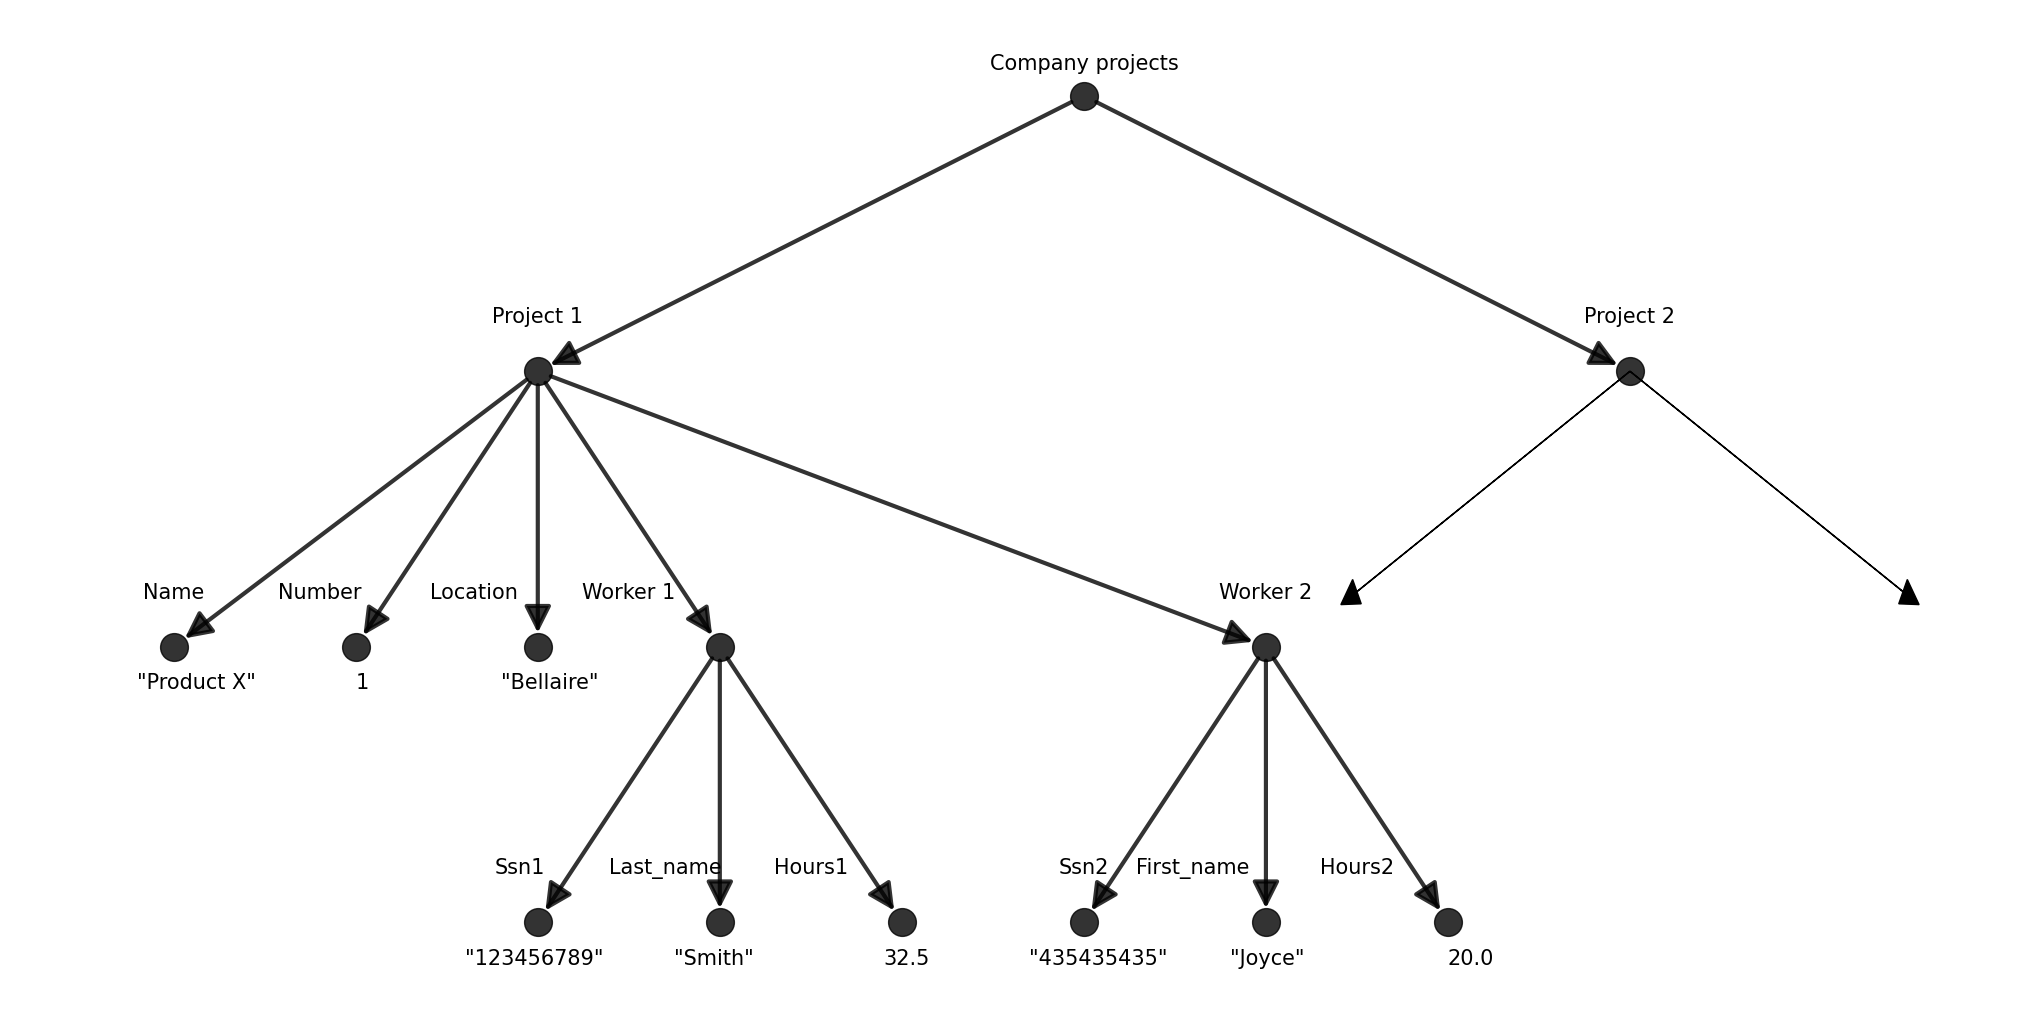

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph():
    """
    Crea y devuelve un grafo dirigido con los nodos y aristas harcodeados.
    """
    G = nx.DiGraph()
    G.add_node("Company projects")
    edges = [
        ("Company projects", "Project 1"),
        ("Company projects", "Project 2"),
        ("Project 1", "Name"),
        ("Project 1", "Number"),
        ("Project 1", "Location"),
        ("Project 1", "Worker 1"),
        ("Project 1", "Worker 2"),
        ("Worker 1", "Ssn1"),
        ("Worker 1", "Last_name"),
        ("Worker 1", "Hours1"),
        ("Worker 2", "Ssn2"),
        ("Worker 2", "First_name"),
        ("Worker 2", "Hours2"),
    ]
    G.add_edges_from(edges)
    return G

def get_positions():
    """
    Define las posiciones de cada nodo en el grafo
    """
    pos = {
        'Company projects': (0, 0),
        'Project 1': (-3, -1),
        'Project 2': (3, -1),
        'Name': (-5, -2),
        'Number': (-4, -2),
        'Location': (-3, -2),
        'Worker 1': (-2, -2),
        'Worker 2': (1, -2),
        'Ssn1': (-3, -3),
        'Last_name': (-2, -3),
        'Hours1': (-1, -3),
        'Ssn2': (0, -3),
        'First_name': (1, -3),
        'Hours2': (2, -3),
    }
    return pos

def get_label_positions(pos):
    """
    A partir de las posiciones originales de los nodos, se definen posiciones personalizadas
    para las etiquetas, ajustando la posición de algunos nodos.
    """
    label_pos = {k: (v[0], v[1]) for k, v in pos.items()}
    custom_positions = {
        'Company projects': (0, 0.12),
        'Project 1': (-3, -0.8),
        'Project 2': (3, -0.8),
        'Worker 1': (-2.5, -1.8),
        'Worker 2': (1, -1.8),
        'Name': (-5, -1.8),
        'Number': (-4.2, -1.8),
        'Location': (-3.35, -1.8),
        'Ssn1': (-3.1, -2.8),
        'Last_name': (-2.3, -2.8),
        'Hours1': (-1.5, -2.8),
        'Ssn2': (0, -2.8),
        'First_name': (0.6, -2.8),
        'Hours2': (1.5, -2.8),
    }
    label_pos.update(custom_positions)
    return label_pos

def draw_graph(G, pos, label_pos):
    """
    Dibuja el grafo y sus etiquetas utilizando las posiciones especificadas.
    """
    nx.draw(
        G, pos=pos,
        with_labels=False,
        node_size=400,
        node_color='black',
        alpha=0.8,
        arrowsize=40,
        width=3
    )
    nx.draw_networkx_labels(G, pos=label_pos, font_size=15)

def add_text_annotations(texts):
    """
    Añade anotaciones de texto al plot. 'texts' es una lista de diccionarios
    donde cada uno contiene las claves 'x', 'y' y 'text', además de opcionalmente 'fontdict'.
    """
    defaultFontDict = {'size': 15, 'color': 'black'}
    for item in texts:
        plt.text(
            item["x"],
            item["y"],
            item["text"],
            fontdict=item.get("fontdict", defaultFontDict)
        )

def draw_arrows(arrows):
    """
    Dibuja flechas en el plot a partir de una lista de diccionarios que contienen
    los parámetros necesarios para plt.arrow.
    """
    for params in arrows:
        plt.arrow(**params)

def main():
    G = create_graph()
    pos = get_positions()
    label_pos = get_label_positions(pos)
    plt.figure(figsize=(20, 10))
    draw_graph(G, pos, label_pos)
    text_annotations = [
        {"x": -5.2, "y": -2.15, "text": '"Product X"'},
        {"x": -4,   "y": -2.15, "text": '1'},
        {"x": -3.2, "y": -2.15, "text": '"Bellaire"'},
        {"x": -3.4, "y": -3.15, "text": '"123456789"'},
        {"x": -2.25,"y": -3.15, "text": '"Smith"'},
        {"x": -1.1, "y": -3.15, "text": '32.5'},
        {"x": -0.3, "y": -3.15, "text": '"435435435"'},
        {"x": 0.8,  "y": -3.15, "text": '"Joyce"'},
        {"x": 2,    "y": -3.15, "text": '20.0'},
    ]
    add_text_annotations(text_annotations)
    arrow_params_list = [
        {
            "x": 3,
            "y": -1,
            "dx": -1.5,
            "dy": -0.8,
            "head_width": 0.1,
            "head_length": 0.1,
            "fc": 'black',
            "ec": 'black'
        },
        {
            "x": 3,
            "y": -1,
            "dx": 1.5,
            "dy": -0.8,
            "head_width": 0.1,
            "head_length": 0.1,
            "fc": 'black',
            "ec": 'black'
        },
    ]
    draw_arrows(arrow_params_list)
    plt.show()
main()